### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cali = pd.read_csv('/Users/apekshasridhar/Downloads/try-it_8_1_starter/data/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
cali.dropna(inplace = True)
cali.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
ocean_proximity = pd.get_dummies(cali['ocean_proximity'])
df = pd.concat([cali.reset_index(), ocean_proximity.reset_index()], axis = 1)
df.drop(['index', 'ocean_proximity'], axis = 1, inplace = True)

In [24]:
## Setting X and y values

X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [25]:
### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)
y_train.head()

(14303, 13)
(6130, 13)


11317    281500.0
15348    237400.0
12101    429000.0
14398    185300.0
16792    384200.0
Name: median_house_value, dtype: float64

In [10]:
highest_corr = cali.corr()[['median_house_value']].nlargest(columns = 'median_house_value', n = 2).index[1]
### END SOLUTION

# Answer check
print(highest_corr)

median_income


In [41]:
### BEGIN SOLUTION
X1 = X_train[['median_income']]
lr = LinearRegression().fit(X1, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X1))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test[['median_income']]))
### END SOLUTION

# Answer check
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  7041871607.27
Test MSE:  6939589489.66


In [26]:
pipe_1 = LinearRegression()
pipe_1.fit(X_train, y_train)
pred_train = pipe_1.predict(X_train)
pred_test = pipe_1.predict(X_test)
pipe_1_train_mse = mean_squared_error(y_train, pred_train)
pipe_1_test_mse = mean_squared_error(y_test, pred_test)


In [27]:
r = permutation_importance(pipe_1, X_test, y_test, random_state = 22)
r.importances_mean

array([4.58951981e-01, 4.67698171e-01, 2.92477498e-02, 2.80177511e-02,
       2.83848390e-01, 2.93618738e-01, 4.94030946e-02, 8.29376786e-01,
       2.41378595e-02, 1.39595535e-01, 9.61303794e-05, 1.25438624e-02,
       6.14439275e-03])

In [62]:
import plotly.express as px
px.bar(x = X_train.columns, y = r.importances_mean, labels = {'x': 'Feature', 'y': 'Permutation Importance'})

In [37]:
px.scatter(x = pred_test, y = y_test, labels = {'x': 'Predicted', 'y': 'Actual'}, trendline = 'ols', trendline_color_override = 'black')


In [34]:
px.bar(x = X_train['median_income'], y = y_train, labels = {'x': 'Median Income', 'y': 'Median House Price'})


In [42]:

train_mses = []
test_mses = []


for i in range(1, 5):
    pipe_2 = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)),
                     ('linreg', LinearRegression())])
    pipe_2.fit(X_train, y_train)
    train_preds = pipe_2.predict(X_train)
    test_preds = pipe_2.predict(X_test)
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))
    
best_model_complexity = test_mses.index(min(test_mses)) + 1
    
train_mses


[4762495980.100052, 3859394091.7518067, 2996886635.647931, 2629018929.8409677]

In [39]:
import plotly.express as px
px.line(x = range(1,5), y = train_mses)

In [43]:
### BEGIN SOLUTION
X1 = X_train[['median_income']]
lr = LinearRegression().fit(X_train, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X_train))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test))
### END SOLUTION

# Answer check
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  4762495980.10
Test MSE:  4594891091.61


In [64]:
### BEGIN SOLUTION
X1 = X_train[['longitude', 'latitude', 'INLAND', 'total_bedrooms', 
       'population', 'median_income']]
lr = LinearRegression().fit(X1, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X1))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test[['longitude', 'latitude', 'INLAND', 
       'total_bedrooms', 'population', 'median_income']]))
### END SOLUTION

# Answer check
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')
X_train.columns

Train MSE:  4945516535.61
Test MSE:  4758067270.36


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

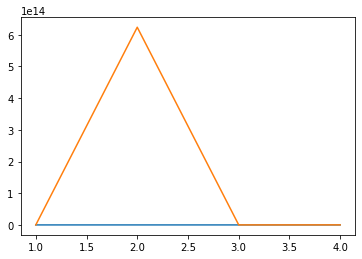

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(1,5), train_mses)
plt.plot(range(1,5), test_mses)

In [66]:
train_mses = []
test_mses = []


for i in range(1, 5):
    pipe_2 = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)),
                     ('linreg', LinearRegression())])
    pipe_2.fit(X1, y_train)
    train_preds = pipe_2.predict(X1)
    test_preds = pipe_2.predict(X_test[['longitude', 'latitude', 'INLAND',
       'total_bedrooms', 'population', 'median_income']])
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))
    
best_model_complexity = test_mses.index(min(test_mses)) + 1

In [68]:
train_mses
test_mses

[4758067270.356417, 4391116089.449288, 8976926576.39014, 595197874507.7297]

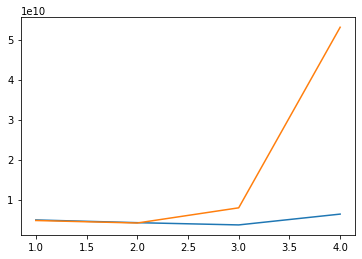

In [58]:
plt.plot(range(1,5), train_mses)
plt.plot(range(1,5), test_mses)